<a href="https://colab.research.google.com/github/SorayaFrancoLopez/NN_churn_proyect_insurance/blob/main/1_exploratory_analysis_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Churn Rate Algorithm/Data/data_csv.csv", delimiter=';', encoding='latin1')

In [ ]:
tamano = df.shape
print('df tiene', tamano[0], 'filas y', tamano[1], 'columnas' )

df tiene 28443 filas y 39 columnas


In [ ]:
df.head()

,codificador,edad,codigo_postal,estado_civil,dominio,sexo,tipo_persona,pais,num_poliza_vigor_2023,num_recibos_2023,...,num_siniestros_2020,num_tareas_cliente_2020,tiempo_invertido_cliente_2020,num_poliza_vigor_2019,num_recibos_2019,primas_pagadas_2019,num_siniestros_2019,num_tareas_cliente_2019,tiempo_invertido_cliente_2019,target
0,RAC000000008,26,48.0,Soltero,0,1,1,108,0,0,...,0,0,0,0,0,0.0,0,0,0,1
1,RAC000000010,24,48.0,Soltero,0,1,1,108,0,0,...,0,0,0,0,0,0.0,0,0,0,1
2,RAC000000011,22,31.0,Soltero,0,0,1,108,0,0,...,0,0,0,0,0,0.0,0,0,0,1
3,RAC000000020,28,20.0,Soltero,0,1,1,108,0,0,...,0,0,0,0,0,0.0,0,0,0,1
4,RAC000000376,23,48.0,Soltero,0,0,1,108,0,0,...,0,0,0,0,0,0.0,0,0,0,1


In [ ]:
df.isnull().sum()==0

codificador                       True
edad                              True
codigo_postal                    False
estado_civil                      True
dominio                           True
sexo                              True
tipo_persona                      True
pais                              True
num_poliza_vigor_2023             True
num_recibos_2023                  True
primas_pagadas_2023               True
num_siniestros_2023               True
num_tareas_cliente_2023           True
tiempo_invertido_cliente_2023     True
num_poliza_vigor_2022             True
num_recibos_2022                  True
primas_pagadas_2022               True
num_siniestros_2022               True
num_tareas_cliente_2022           True
tiempo_invertido_cliente_2022     True
num_poliza_vigor_2021             True
num_recibos_2021                  True
primas_pagadas_2021               True
num_siniestros_2021               True
num_tareas_cliente_2021           True
tiempo_invertido_cliente_

En la columna codigo_postal hay algún valor nulo. Lo relleno con 0.

In [ ]:
df['codigo_postal'] = df['codigo_postal'].fillna(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28443 entries, 0 to 28442
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   codificador                    28443 non-null  object 
 1   edad                           28443 non-null  int64  
 2   codigo_postal                  28443 non-null  float64
 3   estado_civil                   28443 non-null  object 
 4   dominio                        28443 non-null  int64  
 5   sexo                           28443 non-null  int64  
 6   tipo_persona                   28443 non-null  int64  
 7   pais                           28443 non-null  int64  
 8   num_poliza_vigor_2023          28443 non-null  int64  
 9   num_recibos_2023               28443 non-null  int64  
 10  primas_pagadas_2023            28443 non-null  float64
 11  num_siniestros_2023            28443 non-null  int64  
 12  num_tareas_cliente_2023        28443 non-null 

In [ ]:
df = df.astype(int, errors='ignore')

Convierto todas las columnas float en int


In [ ]:
#Esta funcion permite analizar cuantos valores unicos hay en cada columna.
def analizar_columnas(df):
    for columna in df.columns:
        valores_distintos = df[columna].nunique()
        print(f"Columna: {columna}")
        print(f"Valores distintos: {valores_distintos}")
        print("\n")

In [ ]:
analizar_columnas(df)

Columna: codificador
Valores distintos: 28443


Columna: edad
Valores distintos: 108


Columna: codigo_postal
Valores distintos: 55


Columna: estado_civil
Valores distintos: 7


Columna: dominio
Valores distintos: 2


Columna: sexo
Valores distintos: 2


Columna: tipo_persona
Valores distintos: 2


Columna: pais
Valores distintos: 11


Columna: num_poliza_vigor_2023
Valores distintos: 27


Columna: num_recibos_2023
Valores distintos: 41


Columna: primas_pagadas_2023
Valores distintos: 1716


Columna: num_siniestros_2023
Valores distintos: 15


Columna: num_tareas_cliente_2023
Valores distintos: 74


Columna: tiempo_invertido_cliente_2023
Valores distintos: 7


Columna: num_poliza_vigor_2022
Valores distintos: 29


Columna: num_recibos_2022
Valores distintos: 43


Columna: primas_pagadas_2022
Valores distintos: 1612


Columna: num_siniestros_2022
Valores distintos: 12


Columna: num_tareas_cliente_2022
Valores distintos: 65


Columna: tiempo_invertido_cliente_2022
Valores distintos: 7

### Columna codificador

Aplicamos LabelEncoder a la columna codificador.

In [ ]:
le = LabelEncoder()
df['codificador'] = le.fit_transform(df['codificador'])

In [ ]:
df['codificador'].dtype

dtype('int64')

### Columna edad

Se identificaron valores atípicos en el conjunto de datos de edades, algunos de los cuales presentan inconsistencias. Se observaron edades con tres cifras, valores que comienzan con 0 y casos que indican ser menores de edad. Sería recomendable revisar y corregir estos datos para garantizar la integridad y coherencia del análisis de datos.

In [ ]:
#valores con tres dígitos y los que comienzan por 0
valores_tres_digitos = df[df['edad'].astype(str).str.len() == 3]['edad']
valores_con_cero_inicial = df[df['edad'].astype(str).str.startswith('0')]['edad']

print(f"Cantidad de valores con tres dígitos: {len(valores_tres_digitos)}")
print(f"Cantidad de valores que comienzan con 0: {len(valores_con_cero_inicial)}")

Cantidad de valores con tres dígitos: 21
Cantidad de valores que comienzan con 0: 783


In [ ]:
#Valores que cumplen la condición <18 >100
valores_a_reemplazar = df[(df['edad'] < 18) | (df['edad'] > 100)]['edad']
cantidad_valores_a_reemplazar = len(valores_a_reemplazar)

print(f"Hay {cantidad_valores_a_reemplazar} valores en 'edades' por debajo de 18 o por encima de 100.")

Hay 1654 valores en 'edades' por debajo de 18 o por encima de 100.


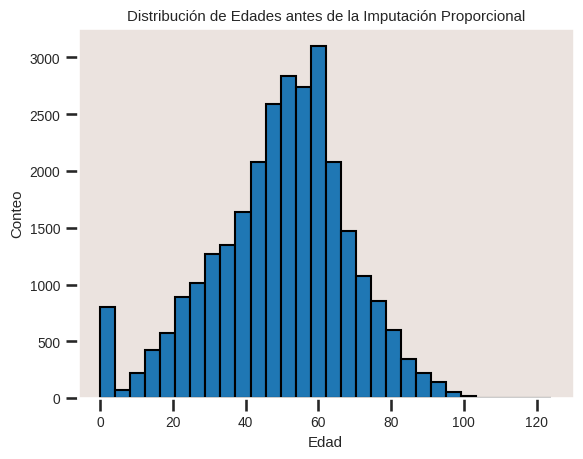

In [ ]:
# Distribución
plt.hist(df['edad'], bins=30, edgecolor='k')
plt.xlabel('Edad')
plt.ylabel('Conteo')
plt.title('Distribución de Edades antes de la Imputación Proporcional')
plt.show()

Modificamos el 5.81%. de los datos en edad. Lo que supone muy poco cambio para el modelo.

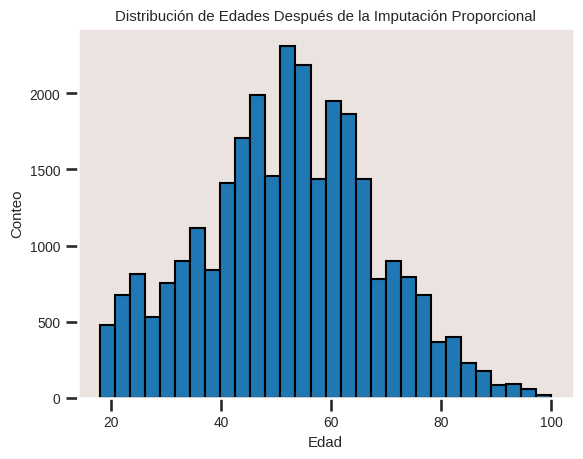

In [ ]:
sustituir_edades = df[(df['edad'] < 18) | (df['edad'] > 100)]['edad']

# Calcula la proporción de los valores actuales
proporcion_valores_actuales = df[(df['edad'] >= 18) & (df['edad'] <= 100)]['edad'].value_counts(normalize=True)

# Genera nuevos valores ponderados proporcionalmente
nuevos_valores = np.random.choice(proporcion_valores_actuales.index, size=len(sustituir_edades), p=proporcion_valores_actuales.values)

# Sustituye los valores
df.loc[(df['edad'] < 18) | (df['edad'] > 100), 'edad'] = nuevos_valores

plt.hist(df['edad'], bins=30, edgecolor='k')
plt.xlabel('Edad')
plt.ylabel('Conteo')
plt.title('Distribución de Edades Después de la Imputación Proporcional')
plt.show()

In [ ]:
df['edad'] = df['edad'].astype(int)

In [ ]:
df['edad'].value_counts()

53     789
52     778
56     756
49     754
51     742
      ... 
97      19
96      18
99       8
98       8
100      6
Name: edad, Length: 83, dtype: int64

### Columna codigo_postal

He consultado fuentes y he no corresponden exactamente a codigos postales. Aun añadiendole 50000 no es posible. He llegado a la conclusion de que esta columna tiene su propia codificacion o hay errores a la hora de introducir los números.

In [ ]:
df['codigo_postal'].unique()

array([48, 31, 20,  1, 39, 26, 28,  9, 46, 29, 21, 24, 49, 50, 25,  8,  0,
        7, 33, 13, 43,  3, 37, 14, 30, 36, 15, 11, 34,  5, 10, 27, 64, 17,
       47, 35,  4,  6, 12, 51, 19, 32, 22, 41, 52, 18, 45, 44, 40, 38, 89,
       23,  2, 42, 16])

### Columna estado_civil

A priori todo parece tener bastante sentido así que aplicaremos un label encoder más adelante.

In [ ]:
df['estado_civil'].unique()

array(['Soltero', 'Casado', 'Separado', 'Pareja de hecho', 'Otro',
       'Viudo', 'Divorciado'], dtype=object)

In [ ]:
df['estado_civil'].value_counts()

Casado             18250
Soltero             8200
Otro                 877
Pareja de hecho      502
Viudo                232
Divorciado           203
Separado             179
Name: estado_civil, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28443 entries, 0 to 28442
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   codificador                    28443 non-null  int64 
 1   edad                           28443 non-null  int64 
 2   codigo_postal                  28443 non-null  int64 
 3   estado_civil                   28443 non-null  object
 4   dominio                        28443 non-null  int64 
 5   sexo                           28443 non-null  int64 
 6   tipo_persona                   28443 non-null  int64 
 7   pais                           28443 non-null  int64 
 8   num_poliza_vigor_2023          28443 non-null  int64 
 9   num_recibos_2023               28443 non-null  int64 
 10  primas_pagadas_2023            28443 non-null  int64 
 11  num_siniestros_2023            28443 non-null  int64 
 12  num_tareas_cliente_2023        28443 non-null  int64 
 13  t

In [ ]:
# Cambiar el nombre de la columna
df.rename(columns={'num_poliza_vgor_2020': 'num_poliza_vigor_2020'}, inplace=True)

### Gráficas

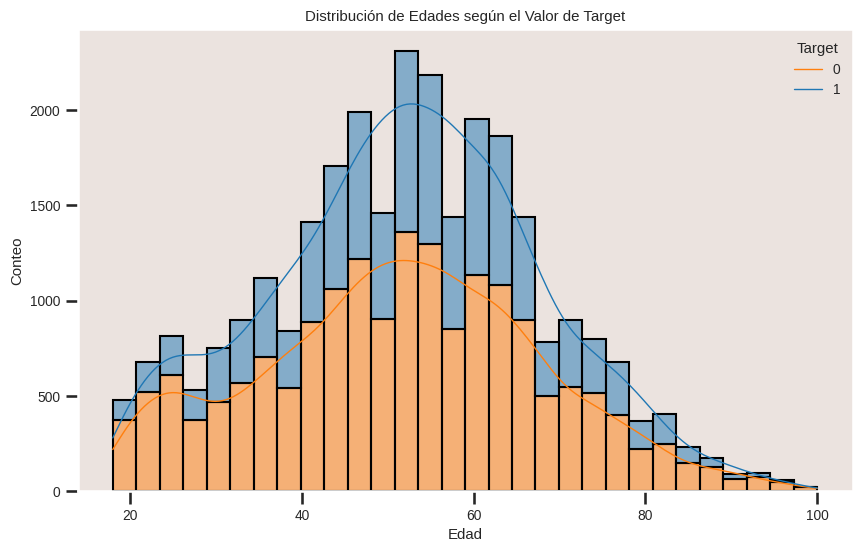

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='edad', hue='target', multiple='stack', bins=30, kde=True)
plt.title('Distribución de Edades según el Valor de Target')
plt.xlabel('Edad')
plt.ylabel('Conteo')
plt.legend(title='Target', labels=['0', '1'])
plt.show()

<Figure size 10000x10000 with 0 Axes>

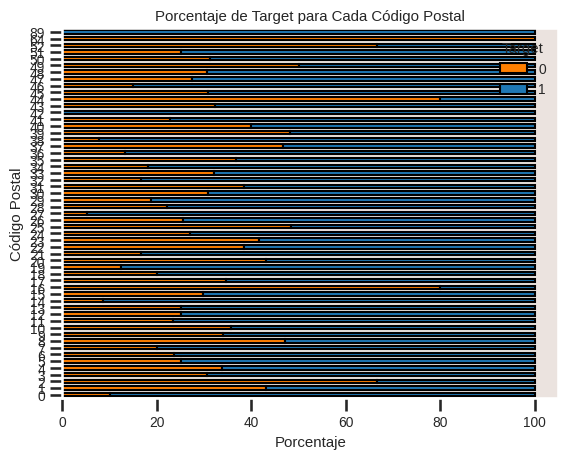

In [ ]:
# Calcular los porcentajes de target para cada código postal
porcentajes_por_codigo_postal = df.groupby(['codigo_postal', 'target']).size().unstack().div(df.groupby('codigo_postal').size(), axis=0) * 100

plt.figure(figsize=(100, 100))
porcentajes_por_codigo_postal.plot(kind='barh', stacked=True, color=['#ff7f00', '#1f78b4'], edgecolor='k')
plt.title('Porcentaje de Target para Cada Código Postal')
plt.ylabel('Código Postal')
plt.xlabel('Porcentaje')
plt.legend(title='Target', labels=['0', '1'])
plt.show()

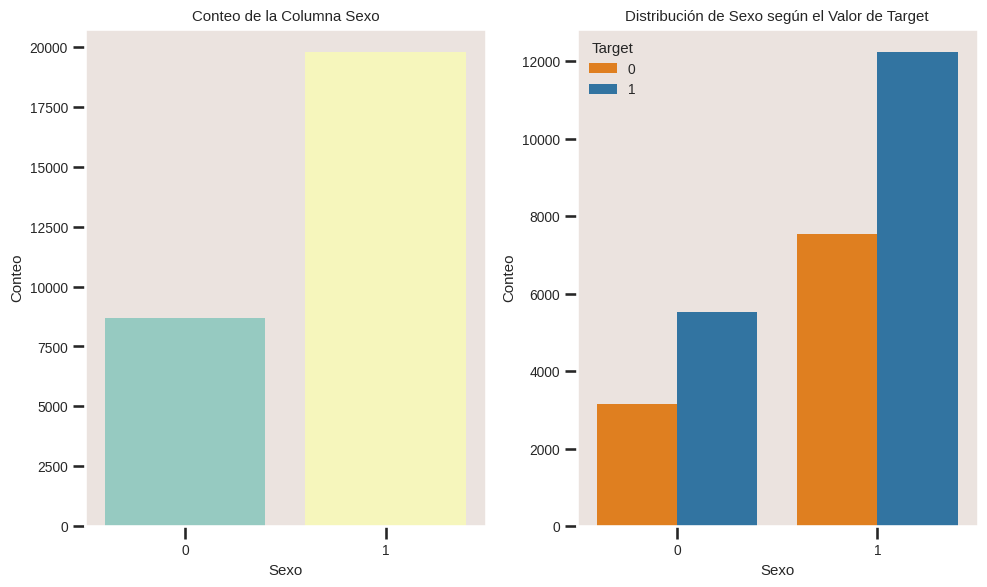

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

# Gráfico de conteo de la columna 'sexo'
sns.countplot(x='sexo', data=df, palette='Set3', ax=axes[0])
axes[0].set_title('Conteo de la Columna Sexo')
axes[0].set_xlabel('Sexo')
axes[0].set_ylabel('Conteo')

# Gráfico de barras apiladas para la relación entre Sexo y Target
sns.countplot(x='sexo', hue='target', data=df, palette=['#ff7f00', '#1f78b4'], ax=axes[1])
axes[1].set_title('Distribución de Sexo según el Valor de Target')
axes[1].set_xlabel('Sexo')
axes[1].set_ylabel('Conteo')
axes[1].legend(title='Target', labels=['0', '1'])

plt.tight_layout()
plt.show()

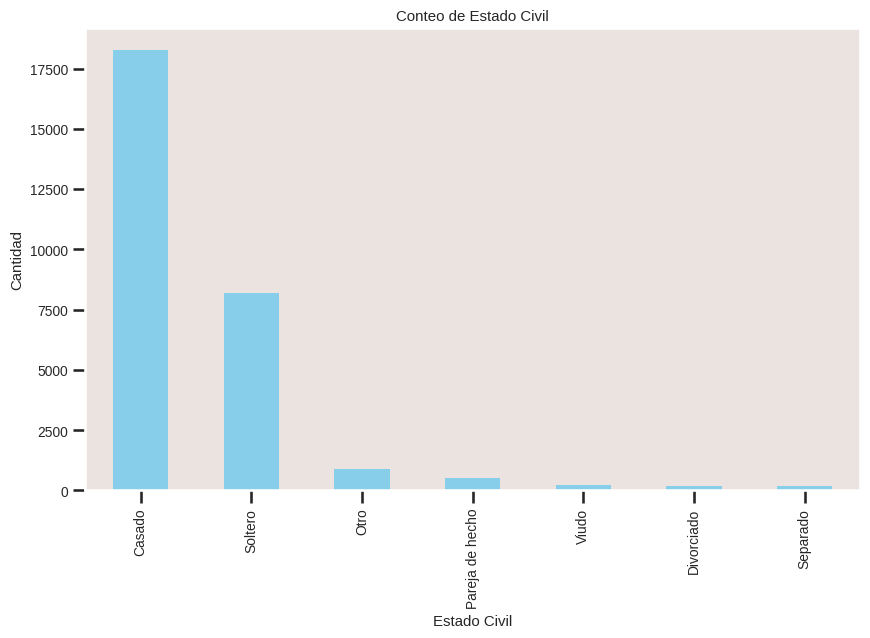

In [ ]:
# Obtén el conteo de valores en la columna 'estado_civil'
conteo_estado_civil = df['estado_civil'].value_counts()

# Grafica los resultados
plt.figure(figsize=(10, 6))
conteo_estado_civil.plot(kind='bar', color='skyblue')
plt.title('Conteo de Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Cantidad')
plt.show()

<Figure size 1000x600 with 0 Axes>

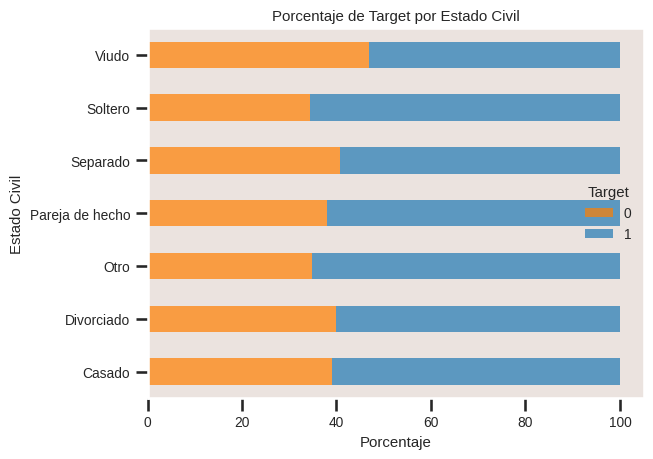

In [ ]:
# Calcular los porcentajes de target para cada Estado Civil
porcentajes_por_estado_civil = df.groupby(['estado_civil', 'target']).size().unstack().div(df.groupby('estado_civil').size(), axis=0) * 100

# Crear el gráfico de barras horizontales apiladas
plt.figure(figsize=(10, 6))
porcentajes_por_estado_civil.plot(kind='barh', stacked=True, color=['#ff7f00', '#1f78b4'], edgecolor='none', alpha=0.7)
plt.title('Porcentaje de Target por Estado Civil')
plt.xlabel('Porcentaje')
plt.ylabel('Estado Civil')
plt.legend(title='Target', labels=['0', '1'])
plt.show()

In [ ]:
#Aplicamos Label Encoder a la columna estado_civil
df['estado_civil'] = le.fit_transform(df['estado_civil'])

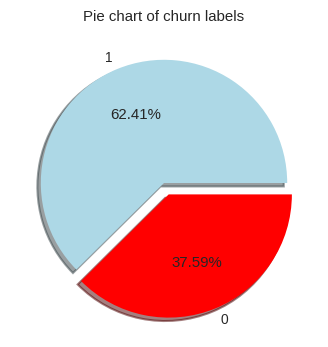

In [ ]:
# Getting a sense of the percentage of churn labels
churn_label_count = df["target"].value_counts()
fig = plt.figure(figsize=(7, 4), dpi=100)
plt.pie(
    churn_label_count,
    autopct="%.2f%%",
    labels=churn_label_count.index,
    colors=["lightblue", "red"],
    explode=[0, 0.1],
    shadow=True,
)
plt.title("Pie chart of churn labels")
plt.show()

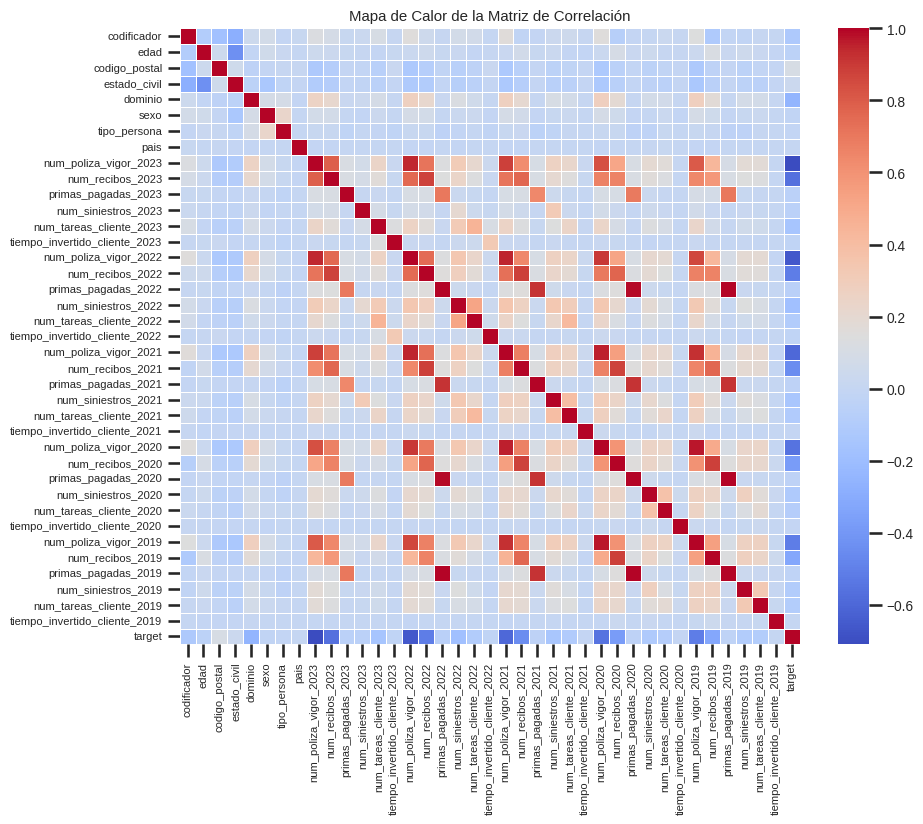

In [ ]:
#Matriz de correlación
correlacion = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=False, cmap='coolwarm', linewidths=.5)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()

In [ ]:
styled_df = (
    df.describe()
    .drop("count", axis=0)
    .style.background_gradient(axis=0, cmap="magma")
    .set_properties(**{"text-align": "center"})
    .set_table_styles([{"selector": "th", "props": [("background-color", "k")]}])
    .set_caption("Summary Statistics")
)

styled_df

,codificador,edad,codigo_postal,estado_civil,dominio,sexo,tipo_persona,pais,num_poliza_vigor_2023,num_recibos_2023,primas_pagadas_2023,num_siniestros_2023,num_tareas_cliente_2023,tiempo_invertido_cliente_2023,num_poliza_vigor_2022,num_recibos_2022,primas_pagadas_2022,num_siniestros_2022,num_tareas_cliente_2022,tiempo_invertido_cliente_2022,num_poliza_vigor_2021,num_recibos_2021,primas_pagadas_2021,num_siniestros_2021,num_tareas_cliente_2021,tiempo_invertido_cliente_2021,num_poliza_vigor_2020,num_recibos_2020,primas_pagadas_2020,num_siniestros_2020,num_tareas_cliente_2020,tiempo_invertido_cliente_2020,num_poliza_vigor_2019,num_recibos_2019,primas_pagadas_2019,num_siniestros_2019,num_tareas_cliente_2019,tiempo_invertido_cliente_2019,target
mean,14221.000000,52.190099,27.807932,1.637345,0.348065,0.695215,0.969166,108.106388,1.014696,1.208909,186.991281,0.107408,0.533769,0.005098,1.205745,1.294167,174.815139,0.093591,0.498049,0.003199,1.408642,1.240200,169.375523,0.074219,0.377140,0.000035,1.617340,1.226488,157.848574,0.044440,0.265478,0.000352,1.816053,1.235278,154.627676,0.052526,0.225328,0.000316,0.624090
std,8210.931190,15.816036,16.602885,2.282615,0.476365,0.460324,0.172870,9.992132,1.841668,2.706246,4407.934874,2.464150,3.882922,0.235266,2.073079,2.818925,3454.923728,0.490070,4.251270,0.182251,2.349390,2.753631,4482.679620,0.431119,2.764402,0.005929,2.618026,2.787362,3947.906351,0.278235,1.917873,0.053693,2.824656,2.789963,4041.434726,0.306937,1.301566,0.047804,0.484365
min,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,104.000000,0.000000,0.000000,-1822.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-588.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-251.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-387.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1337.000000,0.000000,0.000000,0.000000,0.000000
25%,7110.500000,42.000000,20.000000,0.000000,0.000000,0.000000,1.000000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14221.000000,53.000000,28.000000,0.000000,0.000000,1.000000,1.000000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,21331.500000,63.000000,48.000000,5.000000,1.000000,1.000000,1.000000,108.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,116.500000,0.000000,0.000000,0.000000,2.000000,1.000000,27.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,28442.000000,100.000000,89.000000,6.000000,1.000000,1.000000,1.000000,1710.000000,29.000000,44.000000,526291.000000,310.000000,187.000000,18.000000,31.000000,43.000000,569437.000000,28.000000,479.000000,18.000000,35.000000,45.000000,684447.000000,22.000000,203.000000,1.000000,45.000000,49.000000,651872.000000,10.000000,108.000000,9.000000,48.000000,51.000000,671598.000000,10.000000,56.000000,8.000000,1.000000


In [ ]:
"""# Guardar el DataFrame en un archivo CSV
df.to_csv('data_clean.csv', index=False, sep=';', encoding='utf-8')"""